In [2]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

No joblib
no cmocean


In [3]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

tracername = 'HADVv2'
first_year = 2014
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'
months =np.linspace(0,11,12).astype(int)

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [4]:
# ==============================================================================
# Settings for netcdf file

save_netcdf       = True                                            # Saves the interpolated field in netcdf file
delete_old_netcdf = True                                            # If a netcdf file with the same name exists it will be deleted
input_directory  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/' # Where the netcdf is saved
output_directory  = '/scratch/usr/hbkoziel/'+runid+'/DIN_budgetv2/'
plot_netcdf       = False                                         # Reads DIN from the created netcdf file, else it plots the interpolated field (should be the same)

In [5]:
from derivative import derivative

bafux_2d, bafuy_2d = derivative(mesh)
f0 = 2*7.2921e-5 * np.sin(mesh.y2/180.*np.pi)

Starting derivative calculation
Derivative calculated


In [6]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalVol = f.variables['cluster_vol'][:]
f.close()

depth = mesh.zlevs
ind_max_depth = 18
depth = depth[0:ind_max_depth]

In [7]:
for ind in range(0,len(years)):
    depth = mesh.zlevs
    ind_max_depth = 18
    depth = depth[0:ind_max_depth]

    ncfile       = input_directory+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f           = Dataset(ncfile, 'r')
    netcdf_name = tracername+'.'+str(years[ind])+'.monthly.nc'
    
    print years[ind]
    # ==============================================================================
    # Loading data
#     print 'Loading data'
#     u       = f.variables['u'][:].mean(axis=0)
#     v       = f.variables['v'][:].mean(axis=0)
#     din     = f.variables['tr01'][:].mean(axis=0)
    
    UVDN = np.zeros((len(months),len(mesh.x2),len(depth)-1)) * np.nan
    UDN = np.zeros((len(months),len(mesh.x2),len(depth)-1)) * np.nan
    VDN = np.zeros((len(months),len(mesh.x2),len(depth)-1)) * np.nan
    print 'looping over months'
    for mo in months:
        print 'month = ',mo
        if mo ==0: 
            #dayind = (range(0,15))
            dayind = (range(0,45))
            month='JAN'
        if mo ==1: 
            #dayind = (range(15,30))
            dayind = (range(0,45))
            month='FEV'
        if mo ==2: 
            #dayind = (range(30,45))
            dayind = (range(15,60))
            month='MAR'
        if mo ==3: 
            #dayind = (range(45,60))
            dayind = (range(30,75))
            month='APR'
        elif mo ==4: 
            #dayind = (range(60,75))
            dayind = (range(45,90))
            month='MAY'
        elif mo ==5: 
            #dayind = (range(75,90))
            dayind = (range(60,105))
            month='JUN'
        elif mo ==6: 
            #dayind = (range(90,105))
            dayind = (range(75,120))
            month='JUL'
        elif mo ==7:
            #dayind = (range(105,120))
            dayind = (range(90,135))
            month='AUG'
        elif mo ==8: 
            #dayind = (range(120,135))
            dayind = (range(105,150))
            month='SEP'
        elif mo ==9: 
            #dayind = (range(135,150))
            dayind = (range(120,165))
            month='OCT'
        elif mo ==10: 
            #dayind = (range(150,165))
            dayind = (range(135,167))
            month='NOV'
        elif mo ==11: 
            #dayind = (range(165,167))
            dayind = (range(135,167))
            month='DEC'
        
        #print 'loading variable from netcdf file...'
        if years[ind]<2000:
            if mo == 0:
                u    = f.variables['u'][mo:mo+3,:].mean(axis=0)
                v    = f.variables['v'][mo:mo+3,:].mean(axis=0)
                din    = f.variables['tr01'][mo:mo+3,:].mean(axis=0)
            elif ((mo > 0) & (mo < 11)):
                u    = f.variables['u'][mo-1:mo+2,:].mean(axis=0)
                v    = f.variables['v'][mo-1:mo+2,:].mean(axis=0)
                din    = f.variables['tr01'][mo-1:mo+2,:].mean(axis=0)
            elif mo == 11:
                u    = f.variables['u'][mo-2:mo+1,:].mean(axis=0)
                v    = f.variables['v'][mo-2:mo+1,:].mean(axis=0)
                din    = f.variables['tr01'][mo-2:mo+1,:].mean(axis=0)
        else:
            u    = f.variables['u'][dayind,:].mean(axis=0)
            v    = f.variables['v'][dayind,:].mean(axis=0)
            din    = f.variables['tr01'][dayind,:].mean(axis=0)
            
        print 'Looping over depths'
        ula = np.zeros(len(mesh.x2)) * np.nan
        vla = np.zeros(len(mesh.x2)) * np.nan
        dinla = np.zeros(len(mesh.x2)) * np.nan
        for i in range(0,len(depth)-1):
            print 'depth = ', depth[i]
            d_ind   = mesh.n32[:,i]-1
            #d_ind   = d_ind[d_ind > -99]
            
            # fill NaN arrays
            ula[:] =  u[d_ind]
            vla[:] =  v[d_ind]
            dinla[:] =  din[d_ind]
            
            # remove values with shallower depths
            ula[ula == 0] = np.nan
            vla[vla == 0] = np.nan
            dinla[dinla == 0] = np.nan
            
            #print 'Starting rotation'
            (ux,vy)   = pf.vec_rotate_r2g(50, 15, -90, mesh.x2, mesh.y2, ula, vla, flag=1)
            
            # derive derivative
            uDN_elem = np.sum(ux[mesh.elem],axis=1)*np.sum(dinla[mesh.elem] * bafux_2d,axis=1)
            vDN_elem = np.sum(vy[mesh.elem],axis=1)*np.sum(dinla[mesh.elem] * bafuy_2d,axis=1) #over triangle
            uvDN_elem = uDN_elem + vDN_elem
        
            #print 'Create node vector'
            uvDN_node = np.zeros(len(mesh.x2))
            uDN_node = np.zeros(len(mesh.x2))
            vDN_node = np.zeros(len(mesh.x2))
            ind_cnt = np.zeros(len(mesh.x2))
            for ii in range(0,len(mesh.elem)):
              nod_elem=mesh.elem[ii,:]
              uDN_node[nod_elem]=uDN_node[nod_elem]+uDN_elem[ii]
              vDN_node[nod_elem]=vDN_node[nod_elem]+vDN_elem[ii]
              uvDN_node[nod_elem]=uvDN_node[nod_elem]+uvDN_elem[ii]
              ind_cnt[nod_elem]=ind_cnt[nod_elem]+1.
            
            # masking shallower region and 1/2 level more for noise
            uDN_node[mesh.topo < depth[i+1]] = np.nan
            vDN_node[mesh.topo < depth[i+1]] = np.nan
            uvDN_node[mesh.topo < depth[i+1]] = np.nan
            
            # averaging for each nodes and time convertion
            UDN[mo,:,i] = 24 * 3600 * uDN_node/ind_cnt # convertion seconds to day
            VDN[mo,:,i] = 24 * 3600 * vDN_node/ind_cnt # convertion seconds to day
            UVDN[mo,:,i] = 24 * 3600 * uvDN_node/ind_cnt # convertion seconds to day

        tracershape = np.shape(UDN)

    # ==============================================================================
    # Testing if a netcdf file with the same name exists, if yes, it must be removed
    # to save a new one.

    if os.path.isfile(output_directory+netcdf_name) and delete_old_netcdf:
      os.remove(output_directory+netcdf_name)
      print "The netcdf file "+netcdf_name+" has been deleted to make room for your file of the same name."
    elif os.path.isfile(netcdf_name):
      statement = "The netcdf file "+netcdf_name+" already exists! It must be removed for a new one to be created. This can be done by changing your settings."
      sys.exit(statement)

    if not os.path.isdir(output_directory):
      os.makedirs(output_directory)
      print 'Directory '+output_directory+' has been created'

    # ==============================================================================
    # Creating netcdf file
    if save_netcdf:  
      import time
      w_nc_fid = Dataset(output_directory+netcdf_name, 'w', format='NETCDF4_CLASSIC')      # Create and open new netcdf file to write to
      w_nc_fid.description = u'ADVH' 
      w_nc_fid.history     = 'Created ' + time.ctime(time.time())

      nod2d    = w_nc_fid.createDimension('nod2d', tracershape[1])               # Create dimension: number of 3d nodes
      timed	   = w_nc_fid.createDimension('time', tracershape[0]) 
      depthd    = w_nc_fid.createDimension('depth', tracershape[2]) 
    
      w_nc_var = w_nc_fid.createVariable('ADVH', 'f4',('time','nod2d','depth'))           # 'DIN' is name of saved variable/ 'f8' sets presicion to 64-bit floating point
      w_nc_var.setncatts({'long_name': u'ADVH',\
                          'units': u'mmol/m2/day'})
      w_nc_fid.variables['ADVH'][:] = UVDN   
    
      w_nc_var = w_nc_fid.createVariable('ADVU', 'f4',('time','nod2d','depth'))           # 'DIN' is name of saved variable/ 'f8' sets presicion to 64-bit floating point
      w_nc_var.setncatts({'long_name': u'ADVU',\
                          'units': u'mmol/m2/day'})
      w_nc_fid.variables['ADVU'][:] = UDN  
        
      w_nc_var = w_nc_fid.createVariable('ADVV', 'f4',('time','nod2d','depth'))           # 'DIN' is name of saved variable/ 'f8' sets presicion to 64-bit floating point
      w_nc_var.setncatts({'long_name': u'ADVV',\
                          'units': u'mmol/m2/day'})
      w_nc_fid.variables['ADVV'][:] = VDN  
        
      w_nc_fid.close()                                                     # close the new file                

      cwd = os.getcwd()
      print "New netcdf file (",netcdf_name,") has been created."
      print "Location: "+output_directory
    else:
      print 'You have specified not to save your field in netcdf file'
    
#     # Loop over depths
#     for d in range(0,100+1,10):
#         ind_lev = np.max(np.argwhere(mesh.zlevs == d))
#         ind_depth = np.array(mesh.n32[:,ind_lev])

2014
looping over months
month =  0
Looping over depths
depth =  -0.0
depth =  10.0
depth =  20.0
depth =  30.0
depth =  40.0
depth =  50.0
depth =  60.0
depth =  70.0
depth =  80.0
depth =  90.0
depth =  100.0
depth =  115.0
depth =  135.0
depth =  160.0
depth =  190.0
depth =  230.0
depth =  280.0
month =  1
Looping over depths
depth =  -0.0
depth =  10.0
depth =  20.0
depth =  30.0
depth =  40.0
depth =  50.0
depth =  60.0
depth =  70.0
depth =  80.0
depth =  90.0
depth =  100.0
depth =  115.0
depth =  135.0
depth =  160.0
depth =  190.0
depth =  230.0
depth =  280.0
month =  2
Looping over depths
depth =  -0.0
depth =  10.0
depth =  20.0
depth =  30.0
depth =  40.0
depth =  50.0
depth =  60.0
depth =  70.0
depth =  80.0
depth =  90.0
depth =  100.0
depth =  115.0
depth =  135.0
depth =  160.0
depth =  190.0
depth =  230.0
depth =  280.0
month =  3
Looping over depths
depth =  -0.0
depth =  10.0
depth =  20.0
depth =  30.0
depth =  40.0
depth =  50.0
depth =  60.0
depth =  70.0
dept

For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


Text(0.5,1,'Adv')

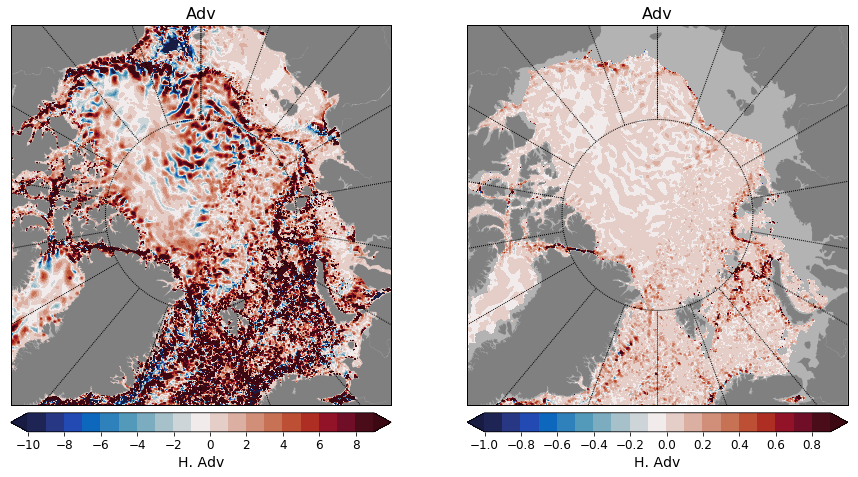

In [8]:
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

datax = np.nansum(UVDN[0,:,:],axis=1)*10
#datax[mesh.topo < 0] = np.nan
data, elem_no_nan = pf.get_data(datax,mesh,0)
ax1      = fig.add_subplot(121)
contours = np.arange(-10, 10, 1)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'H. Adv'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Adv', fontsize=16)

datax = UVDN[0,:,9]
#datax[mesh.topo < 65] = np.nan
data, elem_no_nan = pf.get_data(datax,mesh,0)
ax2      = fig.add_subplot(122)
contours = np.arange(-1, 1, .1)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'H. Adv'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Adv', fontsize=16)

For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


Text(0.5,1,'Adv')

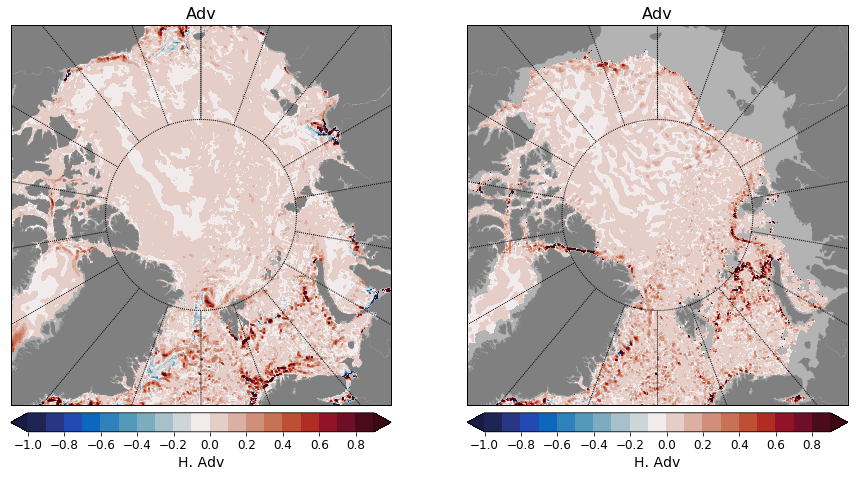

In [9]:
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

datax = UVDN[0,:,0]
#datax[mesh.topo < 0] = np.nan
data, elem_no_nan = pf.get_data(datax,mesh,0)
ax1      = fig.add_subplot(121)
contours = np.arange(-1, 1, .1)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'H. Adv'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Adv', fontsize=16)

datax = UVDN[0,:,9]
#datax[mesh.topo < 65] = np.nan
data, elem_no_nan = pf.get_data(datax,mesh,0)
ax2      = fig.add_subplot(122)
contours = np.arange(-1, 1, .1)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'H. Adv'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Adv', fontsize=16)

For depth 0 model level -0.0 will be used


Text(0.5,1,'DIN')

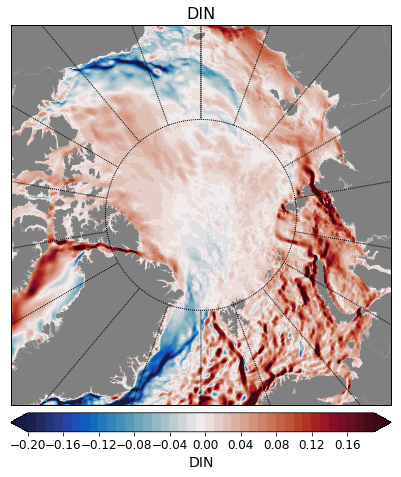

In [10]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

datax = u
#datax[mesh.topo < 0] = np.nan
data, elem_no_nan = pf.get_data(datax,mesh,0)
ax1      = fig.add_subplot(121)
contours = np.arange(-.2, .2, .01)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'DIN'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('DIN', fontsize=16)

In [11]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
plt.plot(UVDN[0,10000,:],-depth[:])

TypeError: 'netCDF4._netCDF4.Dimension' object has no attribute '__getitem__'

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#print 'Create node vector'
uvDN_node = np.zeros(len(mesh.x2))
uDN_node = np.zeros(len(mesh.x2))
vDN_node = np.zeros(len(mesh.x2))
ind_cnt = np.zeros(len(mesh.x2))
for ii in range(0,len(mesh.elem)):
              nod_elem=mesh.elem[ii,:]
              uDN_node[nod_elem]=uDN_node[nod_elem]+uDN_elem[ii]
              vDN_node[nod_elem]=vDN_node[nod_elem]+vDN_elem[ii]
              uvDN_node[nod_elem]=uvDN_node[nod_elem]+uvDN_elem[ii]
              ind_cnt[nod_elem]=ind_cnt[nod_elem]+1.